In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import pickle
from sklearn.decomposition import PCA
def save_data(X : pd.DataFrame, path:str):
    X.to_csv(path+".csv")
    X.to_excel(path+".xlsx")

In [2]:
df = pd.read_csv("Datas/clear_encoded_data.csv")
df

,amines,alcohol,ether,alkyl halide,thiol,aldehyde,ketone,amides,sulfide,carbodiimides,...,azocompound,sulfoxide,azido,nitroso,phospate,phospite,isothio,thioamide,aromatic,cycle
0,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62082,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
62083,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
62084,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
62085,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [3]:
X = df.values
pca = PCA(n_components=3)
pca.fit(X)
transformed_data = pca.transform(X)
pca.inverse_transform(transformed_data)

array([[ 1.25628885,  0.3448865 ,  0.76420534, ...,  0.        ,
         0.9552936 ,  1.76422077],
       [ 1.01919495,  0.34416317,  0.07749074, ...,  0.        ,
         1.26930564,  0.14050518],
       [ 3.02555605,  0.07164156, -0.05015943, ...,  0.        ,
         0.22960594,  2.11788218],
       ...,
       [ 2.05011337,  0.22275565,  0.45256515, ...,  0.        ,
         0.28118069,  2.2855577 ],
       [ 2.04664553,  0.20227042,  0.06974111, ...,  0.        ,
        -0.09766859,  1.89560364],
       [ 0.59813159,  0.41783054,  0.45171782, ...,  0.        ,
         1.42106554,  0.39205454]])

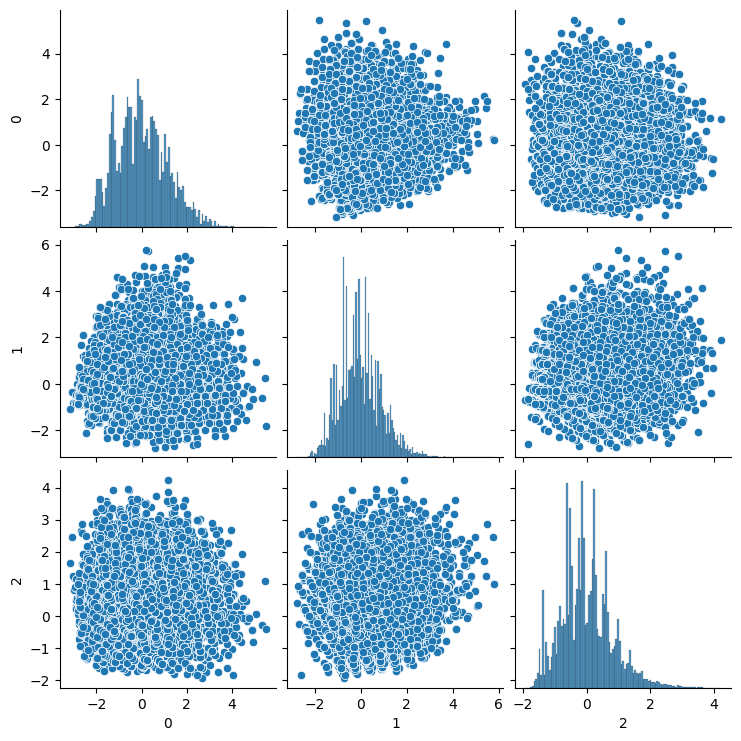

In [4]:
sns.pairplot(pd.DataFrame(transformed_data))

In [6]:
pd.DataFrame(transformed_data).to_csv("Datas/pca_data.csv", index=False)
# Save to file in the current working directory
pkl_filename = "models/pca_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pca, file)